## $\text{Diagrama P-V do Ciclo de Carnot}$

$\text{Derivaremos as funções P(V) a partir da lei dos gases ideais:}$

$$
PV = nRT
$$

$\text{Para as transformações isotérmicas, essa primeira forma basta. Como são caracterizada pela constância}\\
\text{na temperatura, o inteiro termo \textquotedblleft nRT" é uma constante. Divindo V dos dois lados escrevemos:}$

$$
P = \frac{nRT}{V}
$$

$\text{Sabemos que para processos adiabáticos de gases ideais \,} TV^{\gamma - 1}\; \text{é uma constante. Isolando T na primeira} \\
\text{equação e o substituíndo na segunda obtemos:}$

$$ 
PV = nRT \rightarrow T = \frac{PV}{nR}, \\
$$

$$
TV^{\gamma - 1} = \frac{PV}{nR} V^{\gamma - 1} = \frac{PV^{\gamma}}{nR}
$$

$\text{Portanto, podemos dizer que}\; PV^{\gamma} \; \text{também é uma constante. Então:}$

$$
PV^{\gamma} = P_0V_0^{\gamma} \rightarrow P = P_0 \left( \frac{V_0}{V}\right)^{\gamma}
$$

$\text{Assim, temos as duas funções P(V). Os valores das constantes a serem usadas serão:}$

- $R = \text{Importado do scipy} \approx 8.31446261815324 \\$
- $\gamma = 5/3 \; (Cv = 3/2 \cdot R)$
- $n = 1 \\$
- $T_b = 300°K \approx 25°C$
- $T_a = 600°K \approx 325°C$
- $V_1 = 1$
- $V_2 = 2$

$\text{Das relações já discutidas, podemos escrever:}$

$$
T_b V_3^{\gamma - 1} = T_a V_2^{\gamma - 1} \rightarrow V_3 = V_2 \left(\frac{T_a}{T_b} \right)^{\frac{1}{\gamma -1}}, \\
$$

$$
T_b V_4^{\gamma - 1} = T_a V_1^{\gamma - 1} \rightarrow V_4 = V_1 \left(\frac{T_a}{T_b} \right)^{\frac{1}{\gamma -1}}
$$

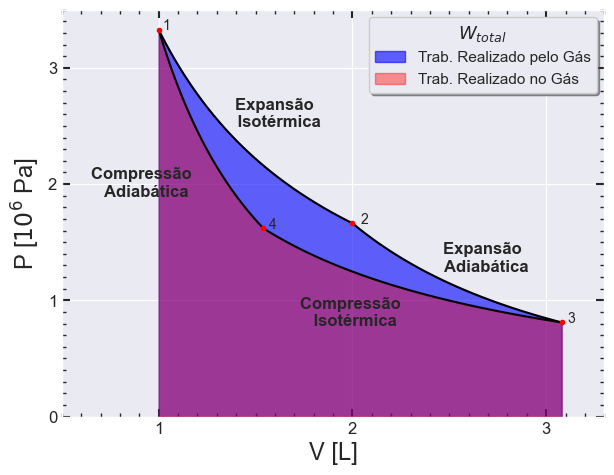

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.constants import R

plt.style.use('seaborn-v0_8-darkgrid')

gamma = 5/3
n = 1

Tb = 300
Ta = 400

V_1 = 1
V_2 = 2

V_3 = V_2 * (Ta/Tb)**(1/(gamma - 1))
V_4 = V_1 * (Ta/Tb)**(1/(gamma - 1))

# Expansão Isotérmica 

V1 = np.linspace(V_1, V_2, 100)
P1 = (n * R * Ta / V1) / 1000

# Expansão Adiabática 

V2_0 = V_2
P2_0 = n * R * Ta / V2_0

V2 = np.linspace(V_2, V_3, 100)
P2 = (P2_0 * (V2_0 / V2)**(gamma)) / 1000

# Compressão Isotérmica 

V3 = np.linspace(V_3, V_4, 100)
P3 = (n * R * Tb / V3) / 1000

# Compressão Adiabática 

V4_0 = V_4
P4_0 = n * R * Tb / V4_0

V4 = np.linspace(V_4, V_1, 100)
P4 = (P4_0 * (V4_0 / V4)**(gamma)) / 1000


''' Plot '''

fig, ax = plt.subplots(figsize = (7,9))

ax.plot(V1, P1, 'k')
ax.plot(V2, P2, 'k')
ax.plot(V3, P3, 'k')
ax.plot(V4, P4, 'k')

ax.plot(V_1, P1[0], 'r', marker = '.')
ax.plot(V_2, P2[0], 'r', marker = '.')
ax.plot(V_3, P3[0], 'r', marker = '.')
ax.plot(V_4, P4[0], 'r', marker = '.')

ax.text(V_1*1.02, P1[0], '1')
ax.text(V_2*1.02, P2[0], '2')
ax.text(V_3*1.01, P3[0], '3')
ax.text(V_4*1.02, P4[0], '4')

ax.set_xlabel('V [L]', fontsize = 17)
ax.set_ylabel('P [$10^6$ Pa]', fontsize = 17)

ax.text(V_1 * 1.61, P1[0] * 0.75, "Expansão \n Isotérmica", ha='center', weight = 'bold', fontsize = 12)
ax.text(V_2 * 1.34, P2[0] * 0.75, "Expansão \n Adiabática", ha='center', weight = 'bold', fontsize = 12)
ax.text(V_3 * 0.65, P3[0] * 0.96, "Compressão \n Isotérmica", ha='center', weight = 'bold', fontsize = 12)
ax.text(V_4 * 0.60, P4[0] * 1.17, "Compressão \n Adiabática", ha='center', weight = 'bold', fontsize = 12)

ax.fill_between(np.concatenate((V1, V2)), np.concatenate((P1, P2)), color ='blue', alpha=0.6, label = 'Trab. Realizado pelo Gás')
ax.fill_between(np.concatenate((V3, V4)), np.concatenate((P3, P4)), color = 'red', alpha=0.4, label = 'Trab. Realizado no Gás')

ax.set_xlim(0.5, 3.3)
ax.set_ylim(0, 3.5)
ax.set_aspect(0.6)

plt.legend(
    title = '$W_{total}$',
    title_fontsize = 13,
    fontsize = 11,
    frameon = True,
    shadow = True,
    fancybox = True,
)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

ax.tick_params(axis='both', which='major',
               direction='in', length=6, width=1.5, labelsize=12,
               top=True, right=True)

ax.tick_params(axis='both', which='minor',
               direction='in', length=3, width=1, labelsize=0,
               top=True, right=True)

for spine in ax.spines.values():
    spine.set_linewidth(1)

plt.show()

$ \text{No diagrama, fica clara a relação entre o trab realizado pelo gás e no gás. Mas, podemos ainda calcular a} \\
\text{área dessa figura:}$

<br>

$$
W_{total} =
\left( \int_{V_1}^{V_2} \frac{nRT_a}{V} \, dV + \int_{V_2}^{V_3} P_2 \left( \frac{V_2}{V} \right)^{\gamma} dV \right) +
\left( \int_{V_3}^{V_4} \frac{nRT_b}{V} \, dV + \int_{V_4}^{V_1} P_4 \left( \frac{V_4}{V} \right)^{\gamma} dV \right)
$$
<br>

$\text{Onde} \; V_3>V_4 \; \text{e} \; V_4>V_1. \; \text{Logo, podemos substituir as duas últimas integrais pelos seus inversos} \\
\text{com os limites trocados. Além disso, podemos tirar as constantes da integração e ficar com:}$

<br>

$$
W_{total} =
nRT_a \int_{V_1}^{V_2} \frac{1}{V}\,dV + P_2V_2^{\gamma} \int_{V_2}^{V_3} V^{-\gamma} dV - nRT_b \int_{V_4}^{V_3} \frac{1}{V}\,dV - P_4V_4^{\gamma} \int_{V_1}^{V_4} V^{-\gamma} dV
$$
<br>

$\text{Para melhor compreensão, separemos os dois processos. Para os processos isotérmicos, teremos:}$

<br>

$$
W_{iso.} = nRT_a \ln{\left(\frac{V_2}{V_1}\right)} - nRT_b \ln{\left(\frac{V_3}{V_4}\right)}
$$

$\text{Para os processos adiabáticos:}$

<br>

$$
W_{adi.} = 

P_2V_2^{\gamma} \int_{V_2}^{V_3} \frac{V^{1 - \gamma}}{1 - \gamma} dV -
P_4V_4^{\gamma} \int_{V_1}^{V_4} \frac{V^{1 - \gamma}}{1 - \gamma} dV =
$$
<br>

$$
W_{adi.} = 

\frac{P_2V_2^{\gamma}}{1 - \gamma} \int_{V_2}^{V_3} V^{1 - \gamma} dV \, - \,
\frac{P_4V_4^{\gamma}}{1 - \gamma} \int_{V_1}^{V_4} V^{1 - \gamma} dV,
$$
<br>

$$
W_{adi.} = 
\frac{P_2V_2^{\gamma}}{1 - \gamma} \, \left[ V_3^{1 - \gamma} - V_2^{1 - \gamma} \right] \, - \,
\frac{P_4V_4^{\gamma}}{1 - \gamma} \, \left[ V_4^{1 - \gamma} - V_1^{1 - \gamma} \right]
$$
<br>

$\text{Botemos então}\; V_2^{1-\gamma} \; \text{e} \; V_4^{1 - \gamma} \; \text{em evidência:}$

<br>

$$
W_{adi.} = 
\frac{P_2V_2^{\gamma}}{1 - \gamma} \, V_2^{1 - \gamma} \left[\left(\frac{V_3}{V_2}\right)^{1 - \gamma} - 1 \right] \, - \,
\frac{P_4V_4^{\gamma}}{1 - \gamma} \, V_4^{1 - \gamma} \left[1 - \left(\frac{V_1}{V_4}\right)^{1 - \gamma} \right]
$$
<br>

$\text{Simplificando e multiplicando em cima e embaixo por -1:}$

<br>

$$
W_{adi.} = 
\frac{P_2V_2}{\gamma - 1} \left[1 - \left(\frac{V_3}{V_2}\right)^{1 - \gamma}\right] \, - \,
\frac{P_4V_4}{\gamma - 1} \left[\left(\frac{V_1}{V_4}\right)^{1 - \gamma}- 1\right ]
$$
<br>

$\text{Fazendo a multiplicação distribuitiva:}$

<br>

$$
W_{adi.} = 
\frac{P_2V_2 - P_2V_2 \left(\frac{V3}{V2}\right) \left(\frac{V2}{V3}\right)^{\gamma}}{\gamma - 1} \; - \;
\frac{P_4V_4 \left(\frac{V1}{V4}\right) \left(\frac{V4}{V1}\right)^{\gamma} - P_4V_4}{\gamma - 1}
$$
<br>

$ \text{Onde sabemos que} \; PV^{\gamma} = \text{constante e, portanto,} \; P_2V_2^{\gamma} = P_3V_3^{\gamma} \; \text{e} \; P_4V_4^{\gamma} = P_1V_1^{\gamma} \, \text{. Isolando} \; P_3 \; \text{e} \; P_1,$
$\text{ficamos com} \; P_3 = P_2\left(\frac{V_2}{V_3}\right)^{\gamma} \text{e} \; P_1 = P_4\left(\frac{V_4}{V_1}\right)^{\gamma}. \; \text{Substituindo na equação de cima:}$

<br>

$$
W_{adi.} = 
\frac{P_2V_2 - P_3V_3}{\gamma - 1} \; - \;
\frac{P_1V_1 - P_4V_4}{\gamma - 1}
$$
<br>

$\text{Finalmente, a partir da equação dos gases ideais} \; PV = nRT:$ 

<br>

$$
W_{adi.} = 
\frac{nRT_2 - nrT_3}{\gamma - 1} \; - \;
\frac{nRT_1 - nRT_4}{\gamma - 1}
$$
<br>

$\text{Substituimos R por seu valor} \; R = C_v (\gamma - 1) \; \text{e substituimos as temperaturas pelos seus respectivos valores}$
$\text{dada a etapa do ciclo.} \; (T_1 = T_2 = T_a) \; \text{e} \; (T_3 = T_4 = T_b)$

<br>

$$
W_{adi.} = 
\frac{nC_v (\gamma - 1) (T_a - T_b)}{\gamma - 1} \; - \;
\frac{nC_v (\gamma - 1) (T_a - T_b)}{\gamma - 1}
$$

$\text{Simplificando,}$

<br>

$$
W_{adi.} = 
nC_v (T_a - T_b) \; - \; 
nC_v (T_a - T_b) \; = \;
0
$$
<br>

$\text{Sabendo agora que a soma do trabalho feito nos processos adiabáticos é zero, voltemos a soma dos processos}\\ \text{isotérmicos.}$

<br>

$$
W_{total} = W_{iso.} =
nRT_a \ln{\left(\frac{V_2}{V_1}\right)} - nRT_b \ln{\left(\frac{V_3}{V_4}\right)}
$$
<br>

$\text{Como demonstramos no pdf, } \; \left(\frac{V_2}{V_1}\right) = \left(\frac{V_3}{V_4}\right).$

<br>

$$
W_{total} = nRT_a \ln{\left(\frac{V_2}{V_1}\right)} - nRT_b \ln{\left(\frac{V_2}{V_1}\right)}
$$
<br>

$\text{Para encontrar a eficiência, dividimos esse trabalho total pelo calor absorvido pelo motor. E sabemos que} \\ \text{esse calor é igual ao trabalho realizado pela expansão isotérmica, pois como não há variação de temperatura,} \\ 
\text{também não haverá variação de energia interna. Da primeira lei da termodinâmica, podemos afirmar então} \\ 
\text{que todo o calor absorvido é convertido em trabalho, e vice-versa! E então, assim como no pdf, simplificaremos} \\ 
\text{os termos sempelhantes} \; nR \ln{\left(\frac{V_2}{V_1}\right)}:$

<br>

$$
\frac{W_{total}}{Q_{absorvido}} = 
\frac{nRT_a \ln{\left(\frac{V_2}{V_1}\right)} - nRT_b \ln{\left(\frac{V_2}{V_1}\right)}}{nRT_a \ln{\left(\frac{V_2}{V_1}\right)}} = \frac{T_a - T_b}{T_a} = 1 - \frac{T_b}{T_a} = \text{Eficiência}
$$
